Database: https://www.kaggle.com/datasets/vikramamin/kc-house-dataset-home-prices

# LINEAR REGRESSION MODEL

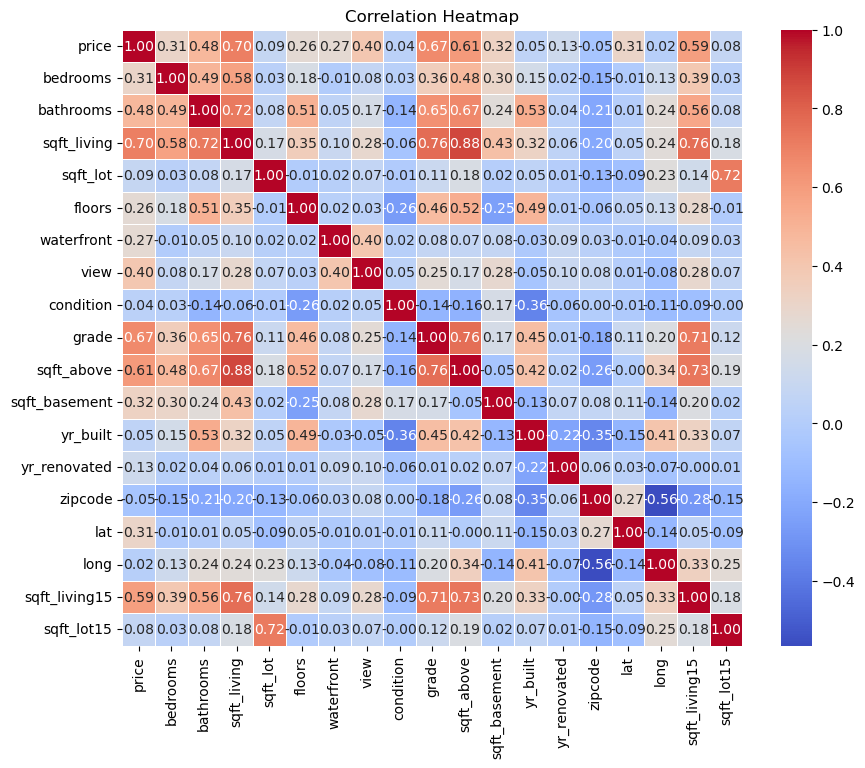

In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is the DataFrame
excel_file_path = 'Housing.xlsx'
df = pd.read_excel(excel_file_path)
 

# Specify columns for correlation
selected_columns = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                    'floors','waterfront','view','condition','grade','sqft_above',
                    'sqft_basement','yr_built','yr_renovated','zipcode','lat','long',
                    'sqft_living15','sqft_lot15']
df_subset = df[selected_columns]

# Display the correlation matrix
correlation_matrix = df_subset.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Specify the dependent and independent variables
dependent_variable = 'price'
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 
                         'sqft_lot','floors','waterfront','view','condition',
                         'grade','sqft_above','sqft_basement','yr_built',
                         'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_subset, test_size=0.2, random_state=42)

# Example linear regression model using statsmodels
X_train = train_data[independent_variables]
y_train = train_data[dependent_variable]
X_test = test_data[independent_variables]
y_test = test_data[dependent_variable]

# Add a constant to the independent variables for statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model.predict(X_test)

# Display the model summary
print("Linear Regression Summary:")
print(model.summary())

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2311.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:19:18   Log-Likelihood:            -2.3557e+05
No. Observations:               17288   AIC:                         4.712e+05
Df Residuals:                   17270   BIC:                         4.713e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.62

In [17]:
# Calculate the absolute percentage error, handling zero values in y_test
absolute_percentage_error = abs((y_test - y_pred) / y_test.replace(0, 1)) * 100

# Calculate the average percentage error
average_percentage_error = absolute_percentage_error.mean()

# Display the average percentage error
print(f"Average Percentage Error: {average_percentage_error:.2f}%")

Average Percentage Error: 25.77%


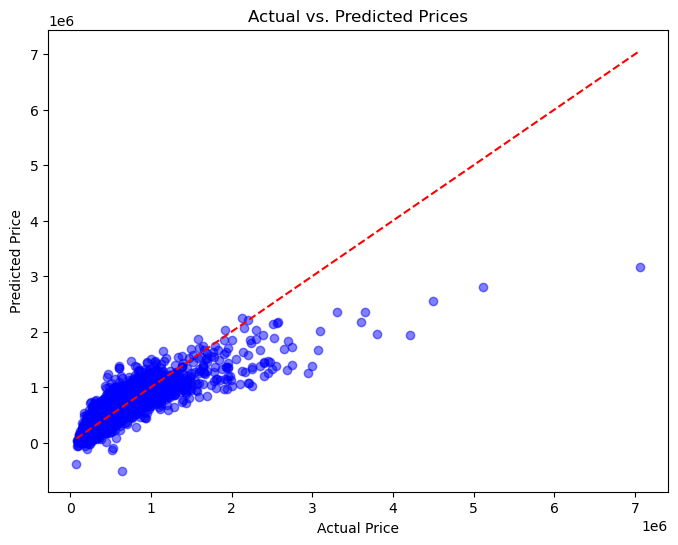

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# USING XGBOOST TO IMPROVE LINEAL PREDICTION

In [19]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task with squared loss
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predict on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_xgb)
print("R-squared:", r_squared)

# Calculate absolute percentage error for each prediction
abs_percentage_error = np.abs((y_test - y_pred_xgb) / y_test) * 100

# Calculate average percentage error
avg_percentage_error = np.mean(abs_percentage_error)
print(f"Average Percentage Error: {avg_percentage_error:.2f}%")

R-squared: 0.8490737049289464
Average Percentage Error: 15.13%


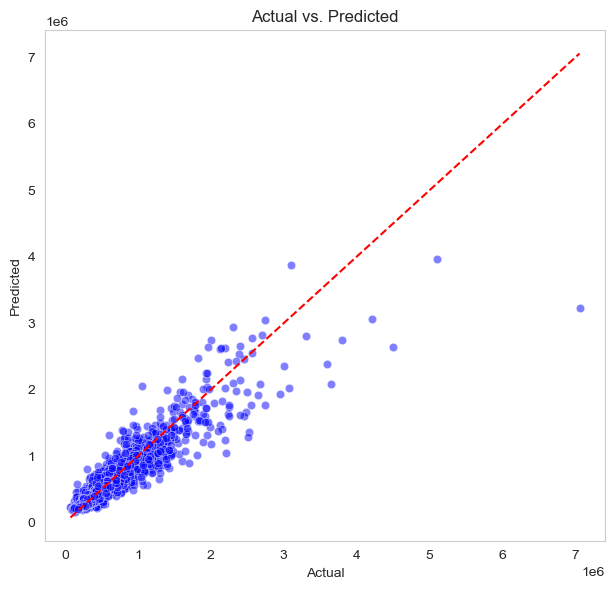

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Plot predicted vs. actual values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb, color='blue', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(False) 

# Plot a diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show plots
plt.tight_layout()
plt.show()

# RANDOM FOREST MODEL

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_subset, test_size=0.2, random_state=42)

# Define dependent and independent variables
dependent_variable = 'price'
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 
                         'sqft_lot','floors','waterfront','view','condition',
                         'grade','sqft_above','sqft_basement','yr_built',
                         'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

# Prepare training and testing data
X_train = train_data[independent_variables]
y_train = train_data[dependent_variable]
X_test = test_data[independent_variables]
y_test = test_data[dependent_variable]

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model if necessary (e.g., calculate R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate percentage error for each prediction
percentage_errors = abs((y_pred - y_test) / y_test) * 100

# Calculate average percentage error
average_percentage_error = percentage_errors.mean()

print(f"Average Percentage Error: {avg_percentage_error:.2f}%")

R-squared: 0.8764475288465027
Average Percentage Error: 15.13%


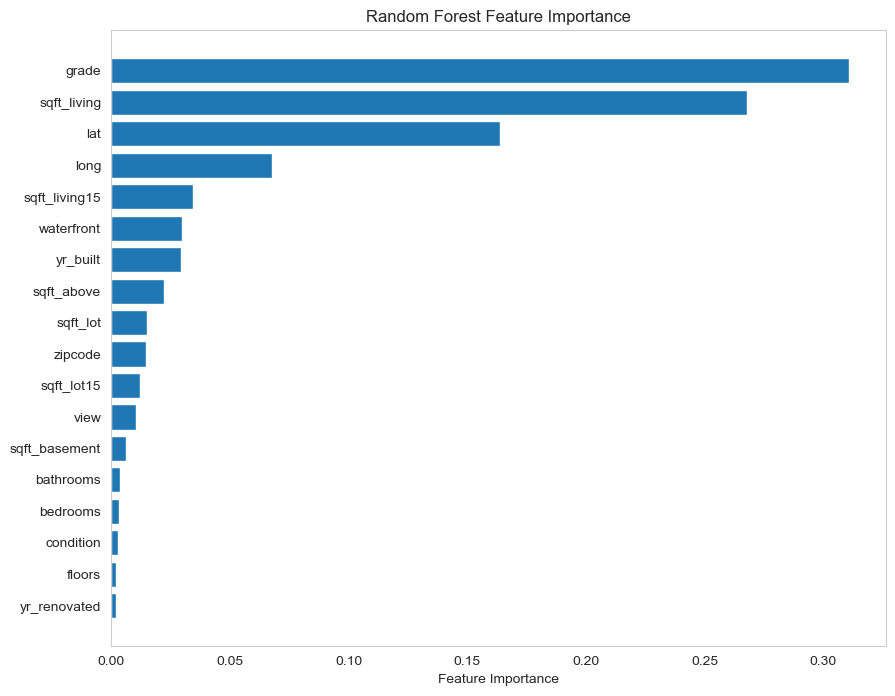

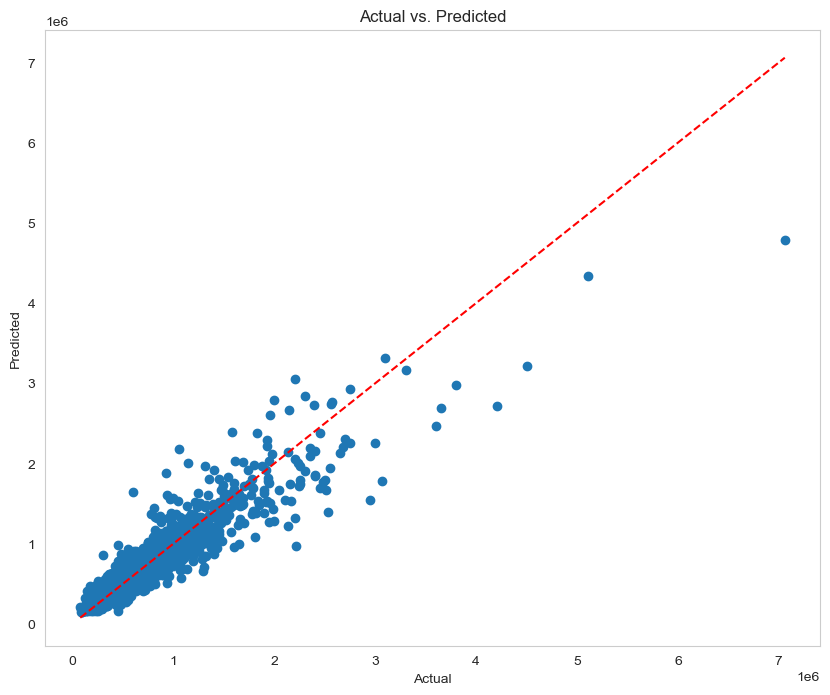

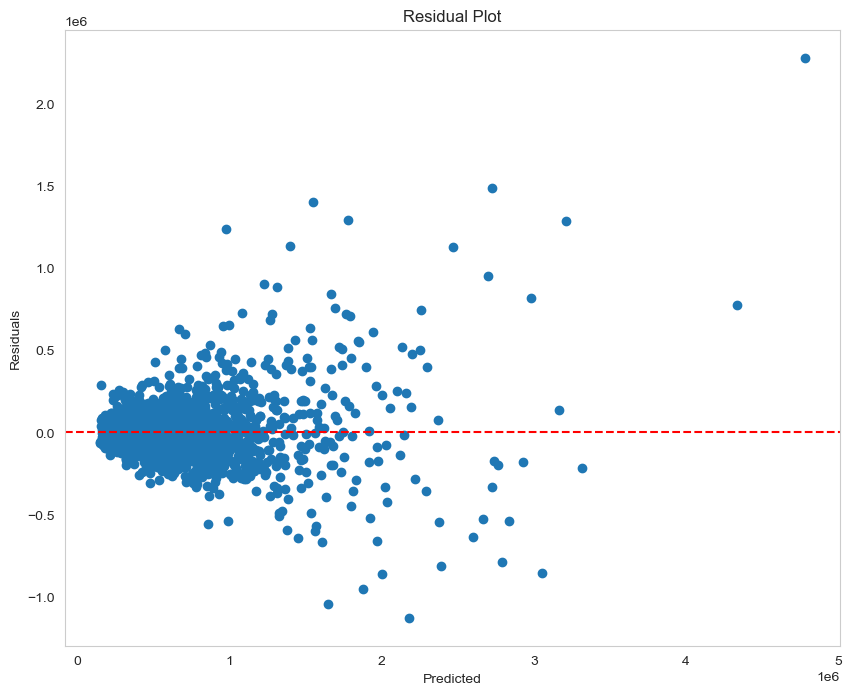

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(independent_variables)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid(False)
plt.show()

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(False) 
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(False) 
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


# CLUSTERING CLASSIFICATION

C:\Users\jcorn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jcorn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jcorn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jcorn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

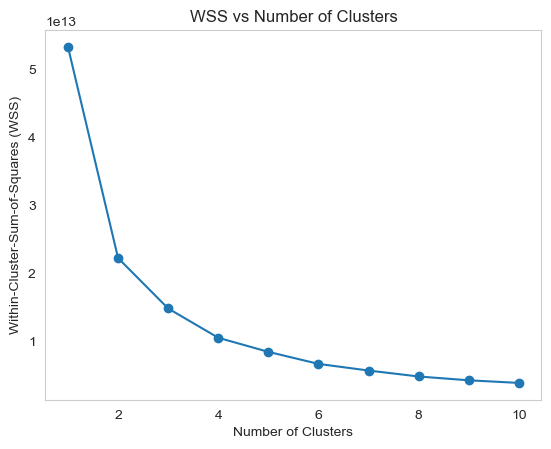

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = ['bedrooms', 'bathrooms', 'sqft_living', 
                         'sqft_lot','floors','waterfront','view','condition',
                         'grade','sqft_above','sqft_basement','yr_built',
                         'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

# Prepare data for clustering
X_clustering = df_subset[clustering_features]

# Calculate WSS for different values of k
wss = []
for k in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    wss.append(kmeans.inertia_)

# Plot the WSS against the number of clusters
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WSS)')
plt.title('WSS vs Number of Clusters')
plt.grid(False)
plt.show()


C:\Users\jcorn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jcorn\AppData\Local\Temp\ipykernel_4940\1394901647.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cluster_label'] = kmeans.labels_


Cluster means for each feature:
                       price  bedrooms  bathrooms  sqft_living       sqft_lot  \
cluster_label                                                                   
0              537727.394128  3.370869   2.305063  2063.382924   10461.644400   
1              644354.469526  3.374718   2.652370  2828.916479  206257.002257   
2              920860.000000  3.200000   2.866667  3184.266667  921718.533333   

                 floors  waterfront      view  condition     grade  \
cluster_label                                                        
0              1.493027    0.007564  0.229093   3.411715  7.644495   
1              1.548533    0.006772  0.474041   3.302483  8.205418   
2              1.733333    0.000000  0.533333   3.333333  8.933333   

                sqft_above  sqft_basement     yr_built  yr_renovated  \
cluster_label                                                          
0              1771.758569     291.624356  1970.756299     84.35266

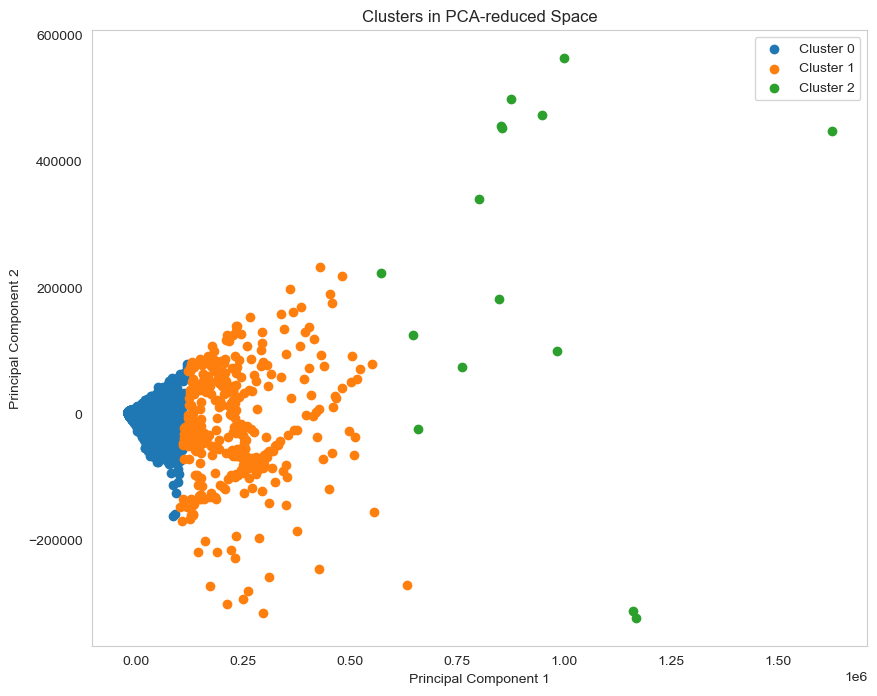

In [31]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3  # According Elbow curve Visualization

# Select features for clustering
clustering_features = ['bedrooms', 'bathrooms', 'sqft_living', 
                         'sqft_lot','floors','waterfront','view','condition',
                         'grade','sqft_above','sqft_basement','yr_built',
                         'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

# Prepare data for clustering
X_clustering = df_subset[clustering_features]

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X_clustering)

# Add cluster labels to the original dataset
df_subset['cluster_label'] = kmeans.labels_

# Analyze the clusters (e.g., mean values of features within each cluster)
cluster_means = df_subset.groupby('cluster_label').mean()

# Print cluster means for each feature
print("Cluster means for each feature:")
print(cluster_means)

# Visualize the clusters if the data is low-dimensional (e.g., using PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Plot clusters in the reduced space
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df_subset['cluster_label'] == cluster, 0], 
                X_pca[df_subset['cluster_label'] == cluster, 1], 
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA-reduced Space')
plt.grid(False) 
plt.legend()
plt.show()